In [41]:
# Our three global feature descriptors are

#1. Color Histogram that quantifies color of the flower.
#2. Hu Moments that quantifies shape of the flower.
#3. Haralick Texture that quantifies texture of the flower.

# imports the necessary libraries we need to work with.
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
# from skimage import feature
from numpy import asarray
import seaborn as sn
import pandas as pd
import numpy as np
import mahotas
import h5py
import cv2
import os
print("[Status]: Done")

[Status]: Done


In [42]:

dataset_path       = "Dataset\FlowerSpecies"
csv_data         = "output\data.csv"
bins             = 8
print("[Status]: Done")

[Status]: Done


In [43]:
# Total we have 532 features
print("Dataset")
dataset = pd.read_csv(csv_data, index_col=False)
dataset

Dataset


,0,1,2,3,4,5,6,7,8,9,...,523,524,525,526,527,528,529,530,531,target
0,0.184988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000000,...,-0.356179,0.997427,0.001392,1.294344e-08,1.576264e-11,2.362576e-11,1.675599e-22,7.093943e-16,-4.240178e-22,ColisFoot
1,0.009137,0.027607,0.035892,0.025877,0.022856,0.005409,0.000171,0.000000,0.019469,0.055142,...,-0.417826,0.998729,0.001285,3.999153e-08,1.308353e-11,1.240816e-12,-4.659802e-24,1.908378e-16,-1.811318e-24,ColisFoot
2,0.025545,0.138692,0.097419,0.029746,0.006570,0.001734,0.000611,0.000586,0.064938,0.329428,...,-0.378930,0.998083,0.001404,6.409473e-09,5.603493e-11,4.478482e-11,-1.693046e-21,3.361158e-15,1.472031e-21,ColisFoot
3,0.307502,0.067096,0.036739,0.038602,0.027459,0.009694,0.002173,0.002518,0.070476,0.102248,...,-0.397676,0.998856,0.001157,2.324336e-08,1.817932e-11,6.867838e-12,-7.173048e-23,-9.329776e-16,-2.727063e-23,ColisFoot
4,0.034159,0.001364,0.001918,0.005391,0.001151,0.000000,0.000000,0.000000,0.031602,0.035011,...,-0.327613,0.996585,0.001032,6.045409e-10,4.703091e-12,2.804578e-12,1.018531e-23,-6.855849e-17,9.447483e-26,ColisFoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.023570,0.001061,0.000645,0.000516,0.000301,0.000330,0.000530,0.000201,0.002007,0.001649,...,-0.316020,0.988116,0.002790,9.844702e-09,7.978470e-11,2.652328e-11,9.994940e-22,1.477162e-15,6.997797e-22,Tigerlily
636,0.000278,0.000080,0.000222,0.001112,0.001916,0.004721,0.010931,0.996832,0.000080,0.000309,...,-0.365934,0.983226,0.000849,8.034375e-11,1.777115e-13,3.491700e-13,6.225078e-26,-2.705756e-18,6.074652e-26,Tigerlily
637,0.000000,0.000000,0.000000,0.000000,0.000019,0.000019,0.000047,0.009369,0.000000,0.000000,...,-0.411821,0.998317,0.001715,3.520274e-08,1.711992e-10,1.026496e-10,4.470081e-21,-1.623771e-14,1.285261e-20,Tigerlily
638,0.000344,0.000021,0.000021,0.000021,0.000064,0.000086,0.000150,0.001096,0.000774,0.000430,...,-0.161884,0.955194,0.001394,1.191749e-08,2.597839e-12,5.991171e-12,-2.830118e-24,2.371580e-16,-2.346594e-23,Tigerlily


In [54]:
X = dataset.iloc[ : , :-1]
print("store features values into x ", X.shape)
Y = dataset.target
print("store features values into y ", Y.shape)

print("No of the features: ", np.array(X).shape[1])
print("Fearture vector size: ", np.array(X).shape)
print("Lables size[Target]: ", np.array(Y).shape)
# print("Lables [Target]: ", np.array(Y))

store features values into x  (640, 532)
store features values into y  (640,)
No of the features:  532
Fearture vector size:  (640, 532)
Lables size[Target]:  (640,)


In [55]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 =   StandardScaler() 
sd_scaler = scaler2.fit_transform(X)
mms_scaler = scaler1.fit_transform(X)
print("[STATUS] feature vector normalized...")
print(pd.DataFrame(mms_scaler).shape)
# x_plot = pd.DataFrame(x_rescaled)
# x_plot.plot.kde()
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(Y)
# print(target)
# print(onehot)
# temp = encoder.inverse_transform(onehot)
# print(temp)
targetNames = np.unique(Y)
print("Target values are: ", target)
print("Target Shape: ", target.shape)
print("Target Names are: ", targetNames)
print("[STATUS] training labels encoded...")

[STATUS] feature vector normalized...
(640, 532)
Target values are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

In [56]:
from sklearn.model_selection import train_test_split
train_frac = 0.7  #60%   left ->: 100-60 = 40%
# valid_frac = 0.5 #(100/20)*10
test_frac = 0.3 #(100/20)*10

x_train, x_test, y_train, y_test = train_test_split(mms_scaler, Y, train_size=train_frac)
# x_train, x_rem, y_train, y_rem = train_test_split(x_rescaled, target, train_size=train_frac)
# x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print("Train vector size: ", x_train.shape, y_train.shape)
print("Test vector size: ", x_test.shape, y_test.shape)
# print("Validation vector size: ", x_valid.shape, y_valid.shape)

Train vector size:  (448, 532) (448,)
Test vector size:  (192, 532) (192,)


In [57]:
label = np.unique(Y)
label

array(['ColisFoot', 'Daffodil', 'Daisy', 'Dandelion', 'Fritillary',
       'Snowdrop', 'Sunflower', 'Tigerlily'], dtype=object)

Test Score :  0.578125
Training done!
Over all train accuracy % :  88.83928571428571
Over all test accuracy % :  57.8125
Confusion Matrix For Test Data set : 

Classification Report for 3-classes: 
              precision    recall  f1-score   support

   ColisFoot       0.59      0.59      0.59        29
    Daffodil       0.34      0.50      0.41        22
       Daisy       0.81      0.78      0.79        27
   Dandelion       0.71      0.24      0.36        21
  Fritillary       0.81      0.81      0.81        21
    Snowdrop       0.72      0.62      0.67        21
   Sunflower       0.40      0.83      0.54        24
   Tigerlily       0.78      0.26      0.39        27

    accuracy                           0.58       192
   macro avg       0.65      0.58      0.57       192
weighted avg       0.65      0.58      0.57       192



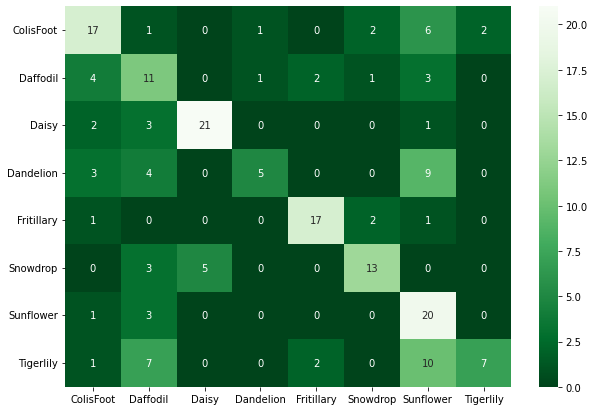

In [58]:
pla_model = Perceptron()
pla_model.fit(x_train, y_train)
print("Test Score : ", pla_model.score(x_test, y_test))
print("Training done!")
# print('Predicted value is =', pla_model.predict([x_test[10]]))
# print('Actual value from test data is %s and corresponding image is as below' % (y_test[10]) )

# print(lm.score(x_test, y_test))
y_pred_test = pla_model.predict(x_test)
y_pred_train = pla_model.predict(x_train)
print("Over all train accuracy % : ", accuracy_score(y_train, y_pred_train)*100)
print("Over all test accuracy % : ", accuracy_score(y_test, y_pred_test)*100)
# print("Over all test accuracy : ", accuracy_score(y_test, y_pred))
# print('Confusion Matrix For Test Data set : \n' + str(confusion_matrix(y_test, y_pred)))
print('Confusion Matrix For Test Data set : \n')
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
# cmap= "Greens_r"
# cmap= "OrRd_r"
# cmap= "OrRd"
cm_df = pd.DataFrame(cm,label,label)
sn.heatmap(cm_df, annot=True,cmap="Greens_r")
print("Classification Report for 3-classes: ")
cr = classification_report(y_test, y_pred_test)
print(cr)